### 사용할 모듈 import

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
%matplotlib inline

### 차트 내 한글 깨짐 방지

In [2]:
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 경고창 무시하기

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

### 서울특별시 관련 데이터만 가지고 오기

In [4]:
df = pd.read_csv('./csvdatas/elicer_2019.csv', encoding = 'utf-8')
seoul = df[df['지역대분류'] == '서울특별시']

In [5]:
seoul.drop(columns=['지역소분류'], inplace = True)
seoul.reset_index(drop = True, inplace = True)

In [6]:
seoul

,날짜,시간,지역대분류,지역중분류,건수
0,2019-08-01,0,서울특별시,구로구,13
1,2019-08-01,0,서울특별시,구로구,4
2,2019-08-01,0,서울특별시,구로구,9
3,2019-08-01,0,서울특별시,구로구,3
4,2019-08-01,0,서울특별시,금천구,3
...,...,...,...,...,...
357208,2021-08-31,23,서울특별시,동작구,7
357209,2021-08-31,23,서울특별시,양천구,1
357210,2021-08-31,23,서울특별시,영등포구,5
357211,2021-08-31,23,서울특별시,영등포구,1


In [7]:
seoul.to_csv('seoul.csv')

In [8]:
seoul[seoul['지역중분류'] == '동대문구']

,날짜,시간,지역대분류,지역중분류,건수
52258,2019-11-18,14,서울특별시,동대문구,1
147038,2020-05-22,14,서울특별시,동대문구,1


In [9]:
seoul_regions = np.sort(pd.unique(seoul['지역중분류']))
seoul_regions

array(['강남구', '강동구', '강북구', '강서구', '관악구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '중구', '중랑구'], dtype=object)

In [10]:
real_seoul = ['중구', '금천구', '송파구', '관악구', '중랑구', '동작구', '성동구', '강북구', '양천구', '서대문구', '구로구', '성북구', '은평구', '영등포구', '서초구', '광진구', '강동구', '마포구', '용산구', '강남구', '강서구', '동대문구', '노원구', '도봉구', '종로구']
set(real_seoul) - set(seoul_regions)
# 광진구, 종로구에 대한 데이터가 누락된 상태

{'광진구', '종로구'}

In [11]:
for r in seoul_regions:
    print(r, len(seoul[seoul['지역중분류'] == r]))
# 강동구, 동대문구, 성동구, 송파구, 중랑구의 경우 데이터가 비교적으로 상당히 적은 상태

강남구 4438
강동구 408
강북구 1644
강서구 7490
관악구 19871
구로구 66377
금천구 32038
노원구 7441
도봉구 35578
동대문구 2
동작구 39304
마포구 2141
서대문구 6383
서초구 9824
성동구 1
성북구 3489
송파구 639
양천구 22180
영등포구 67071
용산구 3362
은평구 26106
중구 1414
중랑구 12


### 데이터 요약해보기

In [12]:
seoul_group_time_count = seoul.groupby(['시간', '날짜'])['건수'].sum().unstack().fillna(0)

In [13]:
seoul_group_time_count
# 날짜 - 시간대별 배달건수 총 합

날짜,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,...,2021-08-22,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31
시간,,,,,,,,,,,,,,,,,,,,,
0,79.0,82.0,119.0,98.0,84.0,86.0,43.0,66.0,59.0,94.0,...,14.0,12.0,15.0,20.0,14.0,18.0,22.0,18.0,5.0,20.0
1,51.0,45.0,40.0,54.0,48.0,37.0,29.0,36.0,22.0,50.0,...,20.0,20.0,14.0,14.0,17.0,14.0,19.0,18.0,18.0,11.0
2,3.0,8.0,12.0,6.0,6.0,3.0,4.0,6.0,8.0,9.0,...,9.0,9.0,3.0,14.0,16.0,8.0,15.0,15.0,9.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,5.0,5.0,2.0,4.0,2.0,4.0,3.0,10.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,5.0,5.0,2.0,3.0,9.0,3.0,10.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,1.0,2.0,6.0,6.0,3.0,4.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,3.0,1.0,1.0,0.0,5.0,4.0,2.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,1.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,3.0,4.0,6.0,4.0,4.0,3.0,3.0,1.0


In [14]:
seoul_group_time_count.reset_index(inplace = True)
seoul_group_time_count

날짜,시간,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,...,2021-08-22,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31
0,0,79.0,82.0,119.0,98.0,84.0,86.0,43.0,66.0,59.0,...,14.0,12.0,15.0,20.0,14.0,18.0,22.0,18.0,5.0,20.0
1,1,51.0,45.0,40.0,54.0,48.0,37.0,29.0,36.0,22.0,...,20.0,20.0,14.0,14.0,17.0,14.0,19.0,18.0,18.0,11.0
2,2,3.0,8.0,12.0,6.0,6.0,3.0,4.0,6.0,8.0,...,9.0,9.0,3.0,14.0,16.0,8.0,15.0,15.0,9.0,8.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,5.0,5.0,2.0,4.0,2.0,4.0,3.0,10.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,5.0,5.0,2.0,3.0,9.0,3.0,10.0
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,1.0,2.0,6.0,6.0,3.0,4.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,3.0,1.0,1.0,0.0,5.0,4.0,2.0,2.0
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,1.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,3.0,4.0,6.0,4.0,4.0,3.0,3.0,1.0
9,9,3.0,4.0,13.0,12.0,5.0,5.0,9.0,8.0,8.0,...,4.0,5.0,10.0,6.0,8.0,7.0,11.0,13.0,4.0,13.0


In [37]:
breakfast = seoul_group_time_count.iloc[6:11]
breakfast = breakfast.aggregate(func = sum)
breakfast = breakfast.iloc[1:]
breakfast

날짜
2019-08-01     67.0
2019-08-02     60.0
2019-08-03    113.0
2019-08-04    107.0
2019-08-05     59.0
              ...  
2021-08-27     95.0
2021-08-28     88.0
2021-08-29     73.0
2021-08-30     63.0
2021-08-31     83.0
Length: 754, dtype: float64

### 코로나 전후 어떤 추세인지 알아보기 위해 Excel을 사용해 커브피팅

In [43]:
breakfast.to_csv('breakfast.csv')

In [42]:
plt.figure(figsize = (255, 25))
plt.plot(breakfast, 'g')
plt.axvline(x = '2020-02-20')
# 커브피팅하기 전에 데이터를 시각화해보기

### 2021년 3월 중순부터 배달 건수가 급격히 줄어듦. 특별한 이유가 있는지 확인해보기 

In [53]:
len(seoul[seoul['날짜'] >= '2021-03-15']) / len(seoul) * 100
# 3월 중순 이후 데이터 길이는 전체 데이터 길이의 14.67%에 불과
# => 3월 중순 이전에 데이터가 5배 이상 몰려있으므로 개수 차이가 났다고 판단할 수 있음
# => 3월 중순 이후 데이터를 제외하고 분석해도 무방

14.673598105332115

In [60]:
breakfast = breakfast.loc[:'2021-03-16']
breakfast.to_csv('breakfast.csv')

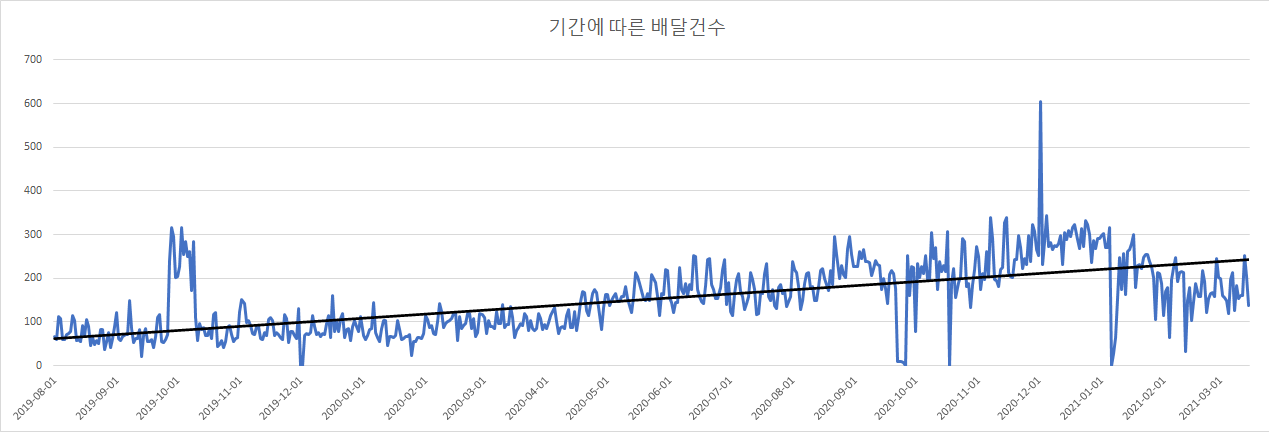

In [62]:
Image("./time_count_breakfast.png")
# 커브피팅 결과, 아침 배달건수가 선형적으로 증가하고 있음

In [16]:
seoul_group_region_count = seoul.groupby(['날짜', '지역중분류'])['건수'].sum().unstack().fillna(0)

In [64]:
seoul_group_region_count.reset_index(inplace = True)

In [74]:
def yyyymm(x):
    res = x.split("-")[0] + x.split("-")[1]
    return res

seoul_group_region_count['연월구분'] = seoul_group_region_count['날짜'].apply(yyyymm)
seoul_group_region_count.to_csv('./csvdatas/seoul_group_region_count.csv')